In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
pd.set_option('max_rows', 2000)

In [3]:
train = pd.read_csv('/Users/mengruiyin/Dropbox/project3/train.csv')

In [3]:
test = pd.read_csv('/Users/mengruiyin/Dropbox/project3/test.csv')

In [7]:
# sample_train.head()

In [4]:
def transform_date(df):
    df['day'] =  pd.DatetimeIndex(df['click_time']).day
    df['weekday'] = pd.DatetimeIndex(df['click_time']).weekday
    df['hour'] = pd.DatetimeIndex(df['click_time']).hour
    df['minutes'] = pd.DatetimeIndex(df['click_time']).minute
    df['seconds'] = pd.DatetimeIndex(df['click_time']).second
    return df

In [6]:
train = transform_date(train)

In [5]:
test = transform_date(test)

In [8]:
test_hour = test.hour.unique()
test_hour

array([ 4,  5,  6,  9, 10, 11, 13, 14, 15])

In [14]:
sample_train = train[((train.hour >= 4) & (train.hour <= 6)) | ((train.hour >= 9) & (train.hour <= 15))]

In [15]:
sample_train.shape

(99332659, 13)

In [16]:
sample_train.hour.unique()

array([14, 15,  4,  5,  6,  9, 10, 11, 12, 13])

In [17]:
sample_train.to_csv('sample_train_new.csv', index = False)

In [18]:
sample_train.shape

(99332659, 13)

In [138]:
def plot_freq(feature):
    feature_count = pd.DataFrame(sample_train.groupby(feature)['click_time'].count()).reset_index()
    feature_count.rename(columns = {'click_time': 'count'}, inplace = True)
    feature_groupby = pd.DataFrame(sample_train.groupby(feature + ['is_attributed'])['click_time'].count()).reset_index()
    feature_groupby.rename(columns = {'click_time': 'download_count'}, inplace = True)
    feature_table = pd.merge(feature_groupby, feature_count, on = feature, how = 'left')
    feature_table['frequency'] = feature_table['download_count']/feature_table['count']
    return feature_table

In [139]:
ip_freq = plot_freq(['ip'])

In [141]:
ip10 = np.random.choice(ip_freq['ip'], 10)

In [149]:
ip10_df = ip_freq[ip_freq.ip.isin(ip10)]

Text(0.5,1,'download ratos and not-donwload ratios for 10 ips')

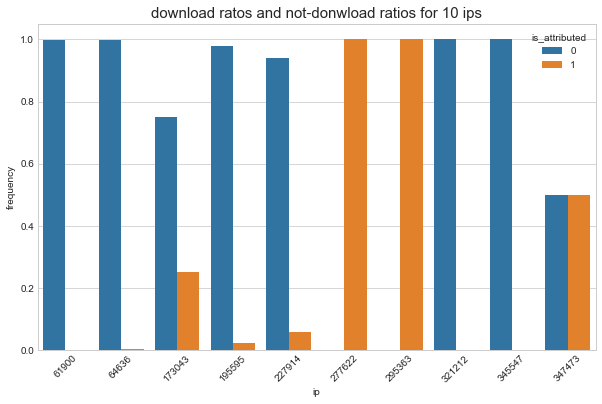

In [150]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="ip", y="frequency", hue="is_attributed", data=ip10_df)
plt.xticks(rotation=45)
plt.title('download ratos and not-donwload ratios for 10 ips', fontsize = 15)

In [143]:
app_freq = plot_freq(['app'])

In [145]:
app10 = np.random.choice(app_freq['app'], 10)

In [151]:
app10_df = app_freq[app_freq.app.isin(app10)]

Text(0.5,1,'download ratos and not-donwload ratios for 10 apps')

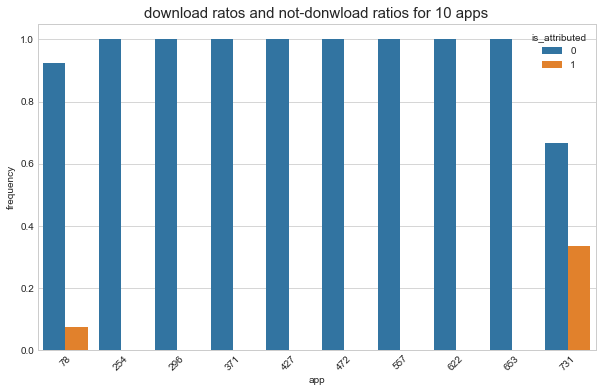

In [152]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="app", y="frequency", hue="is_attributed", data=app10_df)
plt.xticks(rotation=45)
plt.title('download ratos and not-donwload ratios for 10 apps', fontsize = 15)

In [153]:
device_freq = plot_freq(['device'])

In [154]:
device10 = np.random.choice(device_freq['device'], 10)

In [155]:
device10_df = device_freq[device_freq.device.isin(device10)]

Text(0.5,1,'download ratos and not-donwload ratios for 10 devices')

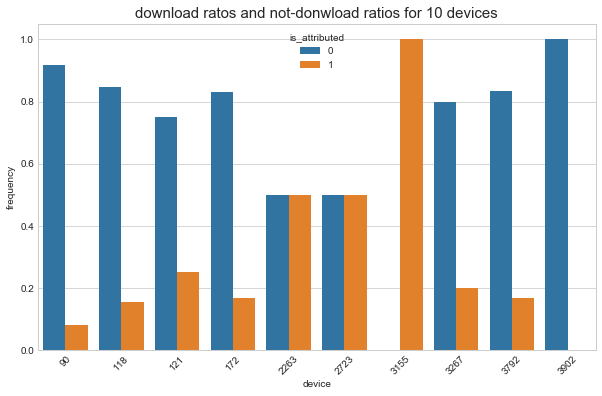

In [156]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="device", y="frequency", hue="is_attributed", data=device10_df)
plt.xticks(rotation=45)
plt.title('download ratos and not-donwload ratios for 10 devices', fontsize = 15)

In [157]:
os_freq = plot_freq(['os'])

In [210]:
os10 = np.random.choice(os_freq['os'], 20)

In [211]:
os10_df = os_freq[os_freq.os.isin(os10)]

Text(0.5,1,'download ratos and not-donwload ratios for 10 os')

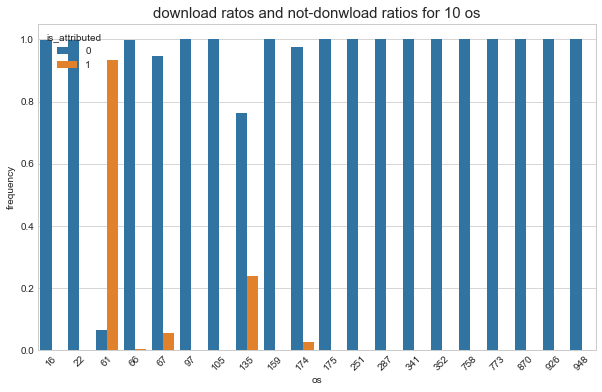

In [212]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="os", y="frequency", hue="is_attributed", data=os10_df)
plt.xticks(rotation=45)
plt.title('download ratos and not-donwload ratios for 10 os', fontsize = 15)

In [213]:
channel_freq = plot_freq(['channel'])

In [225]:
channel10 = np.random.choice(channel_freq['channel'], 10)

In [226]:
channel10_df = channel_freq[channel_freq.channel.isin(channel10)]

Text(0.5,1,'download ratos and not-donwload ratios for 10 channels')

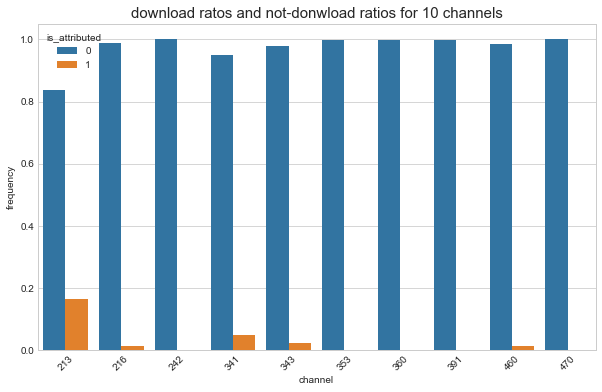

In [227]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="channel", y="frequency", hue="is_attributed", data= channel10_df)
plt.xticks(rotation=45)
plt.title('download ratos and not-donwload ratios for 10 channels', fontsize = 15)

from the correlation table, we could see app has the largest correlation with is-attributed. ip is the second, then device, channel and os. 

In [6]:
sample_train = pd.read_csv('sample_train_new.csv')